Batcch: DS2403                                                                                                          
Name:- Sourabh Solanki

In [2]:
import selenium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
import time
from bs4 import BeautifulSoup
import requests
import re

# 1. Write a python program which searches all the product under a particular product from www.amazon.in. Theproduct to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search forguitars. 

In [23]:
driver=webdriver.Chrome()
driver.get("http://www.amazon.in/")
time.sleep(6)

In [28]:
enter=driver.find_element(By.XPATH,("""/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input"""))
enter.send_keys(input('enter_item:'))
time.sleep(1)

enter_item:Sneaker


In [29]:
search=driver.find_element(By.XPATH,("""/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input"""))
search.click()

# 2. In the above question, now scrape the following details of each product listed in first 3 pages of your searchresults and save it in a data frame and csv. In case if any product has less than 3 pages in search results thenscrape all the products available under that product name. Details to be scraped are: "BrandName", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [10]:
Url=[]
start=0
end=3

for page in range(start,end):
    url_tag=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url_tag:
        Url.append(i.get_attribute('href'))
    next_button=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')  
    next_button.click()
    time.sleep(5)      

In [11]:
len(Url)


193

In [15]:
name=[]
expected_delivery = []
returns = []
availability = []
price=[]
Brand=[]

for url in Url:  
    driver.get(url)
    time.sleep(5)  
        
    try:
        name_tag=driver.find_element(By.XPATH,'//span[@id="productTitle"]')
        name.append(name_tag.text)
    except NoSuchElementException:
        name.append('_')
    
    
    try:
        expected_delivery_tag = driver.find_element(By.XPATH, '//DIV[@class="a-spacing-base"][1]')
        expected_delivery.append(expected_delivery_tag.text)
    except NoSuchElementException:
        expected_delivery.append('_')

    try:
        return_tag = driver.find_element(By.XPATH, '//li[@class="a-carousel-card tw-scroll-carousel-element"][1]//span')
        returns.append(return_tag.text)
    except NoSuchElementException:
        returns.append("_")

    try:
        availability_tag = driver.find_element(By.XPATH, '//div[@id="availability"]')
        availability.append(availability_tag.text)
    except NoSuchElementException:
        availability.append("_")
        
    try:
        price_tag=driver.find_element(By.XPATH,'//span[@class="a-price-whole"][1]')
        price.append(price_tag.text)
    except NoSuchElementException:
        price.append('_')
        
    try:
        Brand_tag = driver.find_element(By.XPATH,'//div[@class="a-section a-spacing-medium brand-snapshot-flex-row"]//p')
        Brand.append(Brand_tag.text)
    except NoSuchElementException:
        Brand.append("_")
       
    

In [39]:
len(name),len(expected_delivery),len(returns),len(availability),len(price),len(Brand),len(Url)


(193, 193, 193, 193, 193, 193, 193)

In [40]:
Product=pd.DataFrame({'Brand name':Brand,'Name of the product':name,'Price':price,'Return/Exchange':returns,'Expected delivery':expected_delivery,'Availability':availability,'Product URL':Url})
Product

,Brand name,Name of the product,Price,Return/Exchange,Expected delivery,Availability,Product URL
0,Neeman's,Neeman's Commuter Basics Sneakers for Men | Ca...,899,10 days Return & Exchange,"FREE delivery Sunday, 24 March. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Crocs,crocs Mens Citilane Roka Court Sneakers,"2,239",10 days Return & Exchange,"FREE delivery Friday, 22 March. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,U.S. POLO ASSN.,US Polo Association Mens Abor Sneakers,"1,903",10 days Return & Exchange,"FREE delivery Friday, 22 March. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Bacca Bucci,Bacca Bucci GYUKI Mid-top Color Block Street F...,"1,599",10 days Return & Exchange,"FREE delivery Friday, 22 March. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,ASIAN,ASIAN Men's Tarzan-11 White Casual Sneaker Hig...,769,10 days Return & Exchange,"FREE delivery Saturday, 23 March. Details",In stock,https://www.amazon.in/ASIAN-Tarzan-11-Sneaker-...
...,...,...,...,...,...,...,...
188,Cruiser,Cruiser Mens Spade Sneakers,"1,099",10 days Return & Exchange,"FREE delivery Monday, 25 March. Details",Available to ship in 1-2 days,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
189,Cruiser,Cruiser Mens Atlas Casual Shoes|Trainers Comfo...,999,10 days Return & Exchange,"FREE delivery Monday, 25 March. Details",Only 3 left in stock.,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
190,YOHO,YOHO Colored Suede Fashion Sneaker for Men | C...,"1,699",10 days Return & Exchange,"FREE delivery Friday, 22 March. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
191,Bacca Bucci,Bacca Bucci Hebron Low-top Street Fashion Snea...,"1,399",10 days Return & Exchange,"FREE delivery Monday, 25 March. Details",Only 1 left in stock.,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


In [43]:
#save in csv file
Product.to_csv('amazone_product.csv',index=False)

# 3. Write a python program to access the search bar and search button on images.google.com and scrape 10images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [35]:
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(2)

In [39]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys('fruits')
time.sleep(1)

In [40]:
search_button=driver.find_element(By.XPATH,'//button[@class="Tg7LZd"]')
search_button.click()
time.sleep(2)

In [43]:
Fruit_url=[]
for i in range(len(Fruit_url)):
    response = requests.get(Fruit_url[i])
    if response.status_code == 200:
        with open(r"F:\Image url\image" + str(i) + ".jpg", 'wb') as file:
            file.write(response.content)
    else:
        print("Failed to download image", i)

In [44]:
file

<_io.BufferedWriter name='F:\\Image url0.jpg'>

In [30]:
search=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search.send_keys('cars')
time.sleep(1)
search_button=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/button')
search_button.click()
time.sleep(2)

cars_url=[]

url_tag=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]//img')
for url in url_tag[0:10]:
    cars_url.append(url.get_attribute('src'))

In [33]:
search=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search.send_keys('Machine_learning')
time.sleep(1)
search_button=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/button')
search_button.click()
time.sleep(2)

machinelearning_url=[]

url_tag=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]//img')
for url in url_tag[0:10]:
    machinelearning_url.append(url.get_attribute('src'))

In [36]:
search=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search.send_keys('Guitar')
time.sleep(1)
search_button=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/button')
search_button.click()
time.sleep(2)

Guitar_url=[]

url_tag=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]//img')
for url in url_tag[0:10]:
    Guitar_url.append(url.get_attribute('src'))

In [38]:
search=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search.send_keys('Cakes')
time.sleep(1)
search_button=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/button')
search_button.click()
time.sleep(2)

cake_url=[]

url_tag=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]//img')
for url in url_tag[0:10]:
    cake_url.append(url.get_attribute('src'))

In [49]:
len(fruits_url),len(cars_url),len(machinelearning_url),len(Guitar_url),len(cake_url)

(10, 10, 10, 10, 10)

In [41]:
images_url=pd.DataFrame({'fruits':fruits_url,'cars':cars_url,'Machine Learning':machinelearning_url,'Guitar':Guitar_url,'Cakes':cake_url})
images_url

,fruits,cars,Machine Learning,Guitar,Cakes
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",https://encrypted-tbn0.gstatic.com/images?q=tb...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
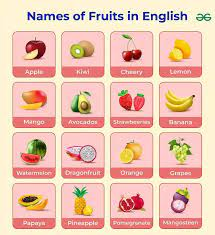
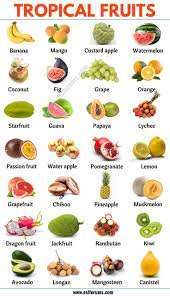
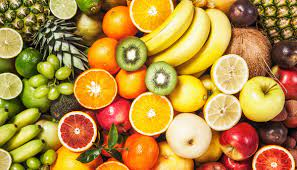
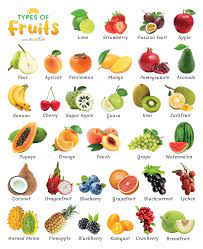
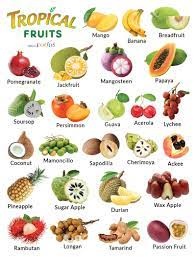
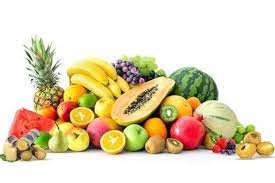
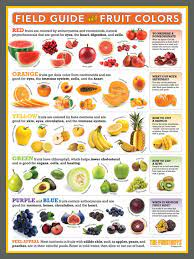
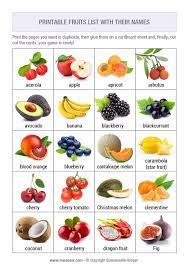
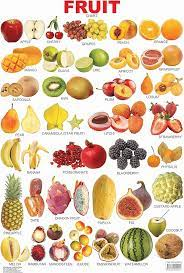
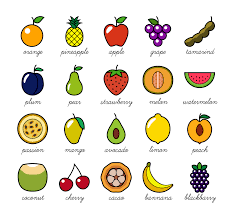

In [42]:
fruits_url

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
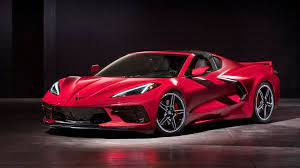
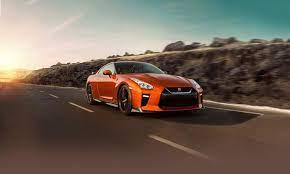
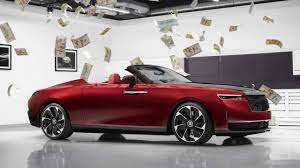
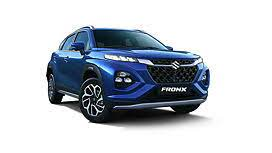
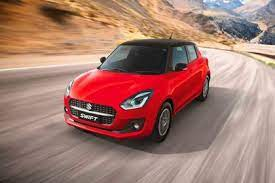
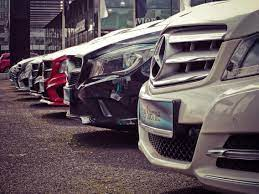
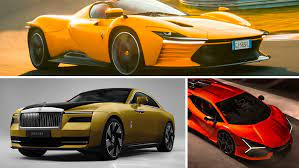
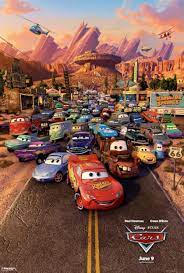
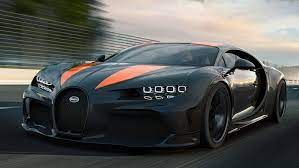
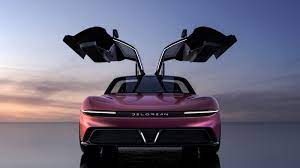

In [43]:
cars_url

['',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxqk04jxT8hbj6pa7L0pP058rAHGMII6C4e9K0oIcstY7NfPOZ67eLCKnJeUqH_514_1w&usqp=CAU',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
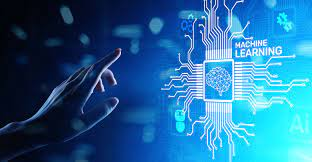
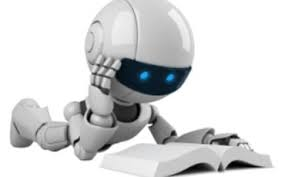
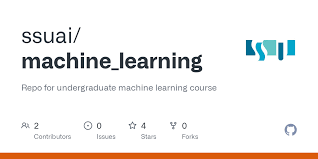
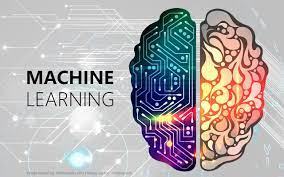
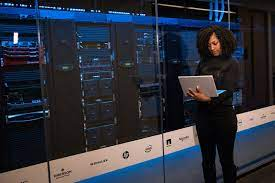
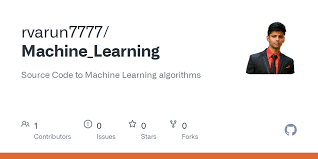
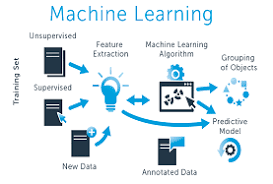
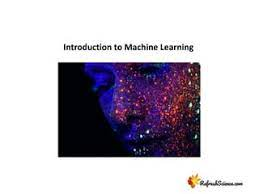
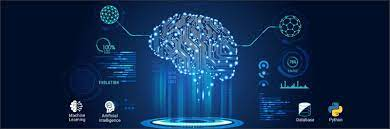

In [44]:
machinelearning_url

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
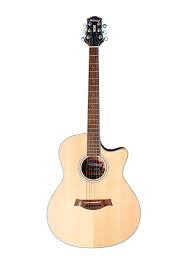
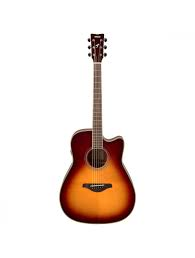
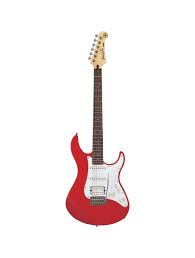
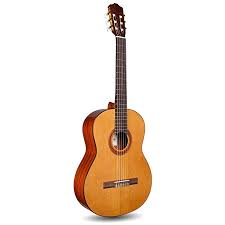
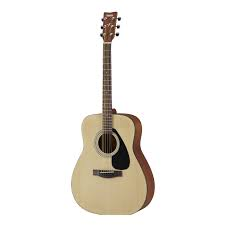
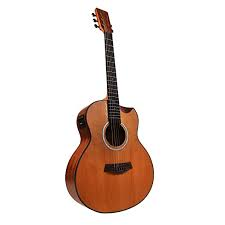
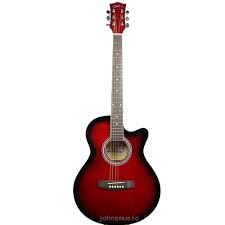
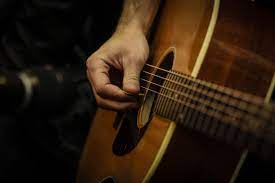
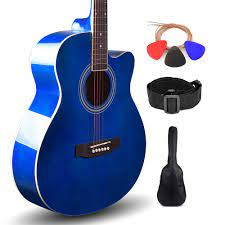
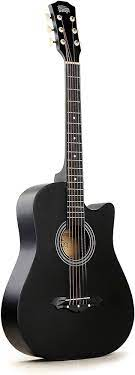

In [46]:
Guitar_url

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
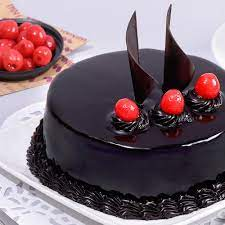
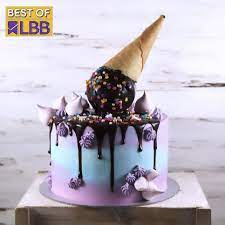
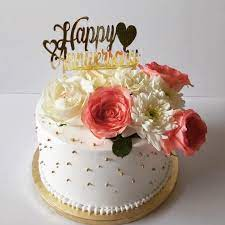
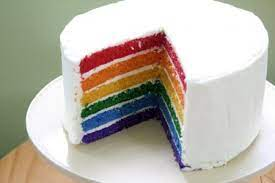
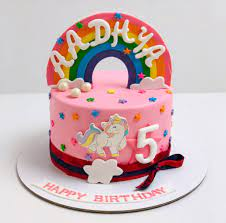
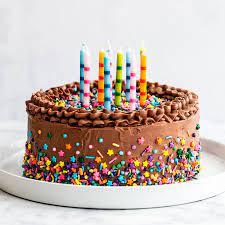
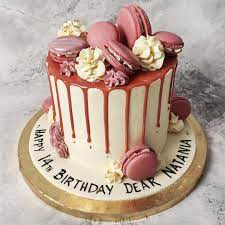
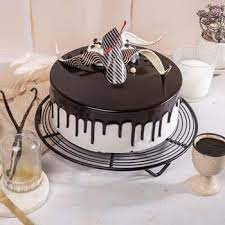
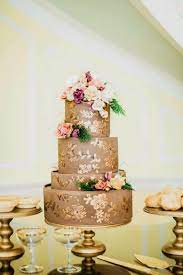
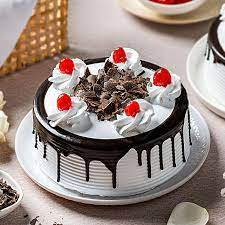

In [47]:
cake_url

# 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.comand scrape following details for all the search results displayed on 1st page. Details to be scraped: “BrandName”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of thedetails is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [29]:
driver=webdriver.Chrome()
driver.get('http://www.flipkart.com/')

In [30]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')
search.send_keys(input('enter item to be searched'))
time.sleep(1)

enter item to be searchedSmartphone


In [31]:
search_button=driver.find_element(By.XPATH,'//button[@class="_2iLD__"]')
search_button.click()
time.sleep(2)

In [32]:
Url=[]

url_tag=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for tag in url_tag:
    Url.append(tag.get_attribute('href'))


In [33]:
len(Url)

24

In [34]:
Brand=[]
name=[]
colour=[]
price=[]

In [35]:
for url in Url:
    driver.get(url)
    time.sleep(5)
    
    try:
        brand_tag=driver.find_element(By.XPATH,'//span[@class="B_NuCI"]')
        Brand.append(brand_tag.text)
    except NoSuchElementException:
        Brand.append('_')
        
    
    
    try:
        name_tag=driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"][1]/table/tbody/tr[3]/td[2]/ul/li')
        name.append(name_tag.text)
    except NoSuchElementException:
        name.append('_')    
        
    try:
        colour_tag=driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"][1]/table/tbody/tr[4]/td[2]/ul/li')
        colour.append(colour_tag.text)
    except NoSuchElementException:
        colour.append('_')
        
    try:
        price_tag=driver.find_element(By.XPATH,'//div[@class="_30jeq3 _16Jk6d"]')
        price.append(price_tag.text)
    except NoSuchElementException:
        price.append('_')

In [36]:
Brands=[i.split()[0] for i in Brand]   

In [37]:
storage=[]

storage_tag=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[1]')
for tag in storage_tag:
    storage.append(tag.text)
    

In [38]:
RAM=[i.split()[0] for i in storage]
storage_ROM=[i.split()[4] for i in storage]

In [39]:
Cameras=[]

camera_tag=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[3]')
for tag in camera_tag:
    result=re.findall(r'\b([^\(|]+)\|', tag.text)
    Cameras.append(result)
    

In [40]:
secondarycamera=[]

camera_tag=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[3]')
for tag in camera_tag:
    result=re.findall(r'\|(.*)', tag.text)
    secondarycamera.append(result)
    

In [45]:
display=[]

display_tag=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[2]')
for tag in display_tag:
    display.append(tag.text)

In [41]:
battery=[]

battery_tag=driver.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[4]')
for tag in battery_tag:
    battery.append(tag.text)

In [47]:
  len(Brands),len(name),len(colour),len(RAM),len(storage_ROM),len(Cameras),len(secondarycamera),len(display),len(battery),len(price),len(Url)

(24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24)

In [48]:
Smartphone=pd.DataFrame({'Brand Name':Brands,'Smartphone Name':name,'Colour':colour,'RAM (GB)':RAM,'Storage(ROM)(GB)':storage_ROM,'Primary Camera':Cameras,'Secondary Camera':secondarycamera,'Display Size':display,'Battery Capacity':battery,'Price':price,'Product URL':Url})
Smartphone

,Brand Name,Smartphone Name,Colour,RAM (GB),Storage(ROM)(GB),Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Product URL
0,Motorola,G34 5G,Ocean Green,8,128,[50MP + 2MP ],[ 16MP Front Camera],16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-ocean...
1,POCO,C55,Power Black,4,64,[50MP Dual Rear Camera ],[ 5MP Front Camera],17.04 cm (6.71 inch) HD+ Display,5000 mAh Battery,"₹5,999",https://www.flipkart.com/poco-c55-power-black-...
2,Motorola,G34 5G,Ice Blue,8,128,[50MP + 2MP ],[ 16MP Front Camera],16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-ice-b...
3,Motorola,G34 5G,Charcoal Black,8,128,[50MP + 2MP ],[ 16MP Front Camera],16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-charc...
4,realme,C53,Champion Gold,6,128,[108MP + 2MP ],[ 8MP Front Camera],17.12 cm (6.74 inch) HD Display,5000 mAh Battery,"₹9,199",https://www.flipkart.com/realme-c53-champion-g...
5,realme,C53,Champion Black,4,64,[8MP Dual Rear Camera ],[ 5MP Front Camera],16.56 cm (6.52 inch) HD+ Display,5000 mAh Battery,"₹7,499",https://www.flipkart.com/realme-c53-champion-b...
6,POCO,C51,Royal Blue,6,64,[108MP + 2MP ],[ 8MP Front Camera],17.12 cm (6.74 inch) HD Display,5000 mAh Battery,"₹4,999",https://www.flipkart.com/poco-c51-locked-airte...
7,realme,C53,Champion Black,6,128,[108MP + 2MP ],[ 8MP Front Camera],17.12 cm (6.74 inch) HD Display,5000 mAh Battery,"₹9,199",https://www.flipkart.com/realme-c53-champion-b...
8,POCO,C51,Power Black,4,64,[8MP Dual Rear Camera ],[ 5MP Front Camera],16.56 cm (6.52 inch) HD+ Display,5000 mAh Battery,"₹4,999",https://www.flipkart.com/poco-c51-locked-airte...
9,realme,C67 5G,Sunny Oasis,4,128,[50MP + 2MP ],[ 8MP Front Camera],17.07 cm (6.72 inch) Full HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/realme-c67-5g-sunny-o...


In [49]:
Smartphone.to_csv('Flipkart_smartphone.csv',index=False)

# 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [89]:
driver=webdriver.Chrome()
driver.get('https://www.google.com/maps/@13.0187264,77.5880704,12z?entry=ttu')


In [91]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
search.send_keys(input('Enter city name to be searched'))


Enter city name to be searchedBangalore


In [92]:
search_button=driver.find_element(By.XPATH,'//button[@class="mL3xi"]')
search_button.click()

In [109]:
url_string=driver.current_url
print('URL extracted:',url_string)
lat_lang=re.findall(r'@(.*)data',url_string)
lat_lang

URL extracted: https://www.google.com/maps/place/Bengaluru,+Karnataka/@12.9544595,77.3012695,10z/data=!4m15!1m8!3m7!1s0x3bae1670c9b44e6d:0xf8dfc3e8517e4fe0!2sBengaluru,+Karnataka!3b1!8m2!3d12.9715987!4d77.5945627!16zL20vMDljMTc!3m5!1s0x3bae1670c9b44e6d:0xf8dfc3e8517e4fe0!8m2!3d12.9715987!4d77.5945627!16zL20vMDljMTc?entry=ttu


['12.9544595,77.3012695,10z/']

In [111]:
for i in lat_lang:
    result=i.split(',')
result    

['12.9544595', '77.3012695', '10z/']

In [112]:
result.pop(-1)

'10z/'

In [113]:
Latitude=result[0]
Longitude=result[1]
print('Latitude:',latitude)
print('Longitude:')

['12.9544595', '77.3012695']

# 6. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [3]:
driver=webdriver.Chrome()
driver.get('https://www.digit.in/')

In [4]:
gaming_laptop=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div/div/div/article/div/div/div/div[2]/div/div[1]/div[3]/div[1]/div[6]/div[1]/div[1]/a')
gaming_laptop.click()

In [5]:
name=[]

name_tag=driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]')
for tag in name_tag:
    name.append(tag.text)

In [29]:
OS=[]

os_tag=driver.find_elements(By.XPATH,'//span[@class="meta_v_value"]')
for tag in os_tag:
    result=tag.text
    OS.append(result)

In [52]:
Display_size=OS[1::3]
Processor=OS[2::3]

In [44]:
product_url=[]

url_tag=driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]//a')
for url in url_tag:
    product_url.append(url.get_attribute('href'))

In [53]:
len(name),len(Display_size),len(Processor),len(product_url)

(7, 7, 7, 7)

In [54]:
Laptop=pd.DataFrame({'Name':name, 'Display_size':Display_size,'Processor':Processor,'Product_URL':product_url})
Laptop

,Name,Display_size,Processor,Product_URL
0,MSI Sword 15 A12VF-401IN | 12th Gen Core i7-12...,15.6,12th Gen Intel Core i7-12650H,https://www.digit.in/laptops/msi-sword-15-a12v...
1,Dell G15-5525 D560898WIN9S Ryzen R7-6800H,15.6,AMD Ryzen 7-6800H,https://www.digit.in/laptops/dell-g15-5525-d56...
2,HP Omen Gaming Laptop (16-xf0059AX),16.1,AMD Ryzen 7-7840HS,https://www.digit.in/laptops/hp-omen-gaming-la...
3,Lenovo Legion 5 Pro (82WM00B7IN),16,AMD Ryzen 7-7745HX,https://www.digit.in/laptops/lenovo-legion-5-p...
4,HP Omen 17-ck2004TX 13th Gen Core i9-13900HX,17.3,2560 x 1440,https://www.digit.in/laptops/hp-omen-17-ck2004...
5,Dell Alienware m18 R1 Gaming Laptop,Windows 11 Home,18,https://www.digit.in/laptops/dell-alienware-m1...
6,Apple MacBook Pro 16”,MacOS,16,https://www.digit.in/laptops/apple-macbook-pro...


# 7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [29]:
driver=webdriver.Chrome()
driver.get('http://www.forbes.com/')
time.sleep(2)
           

In [30]:
billionaires=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]/a')
billionaires.click()
time.sleep(1)

In [24]:
Rank=[]
name=[]
net_worth=[]
Age=[]
Citizenship=[]
source=[]
Industries=[]


rank_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[1]/div')
try:
    for tag in rank_tag:
        Rank.append(tag.text)
except NoSuchElementException:
    Rank.append('_')

name_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[2]')
try:
    for tag in name_tag:
        name.append(tag.text)
except NoSuchElementException:
        name.append('_')

net_worthtag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[3]')
try:
    for tag in net_worthtag:
        net_worth.append(tag.text)
except NoSuchElementException: 
    net_worth.append('_')


age_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[4]')
try:
    for tag in age_tag:
        Age.append(tag.text)
except NoSuchElementException:
    Age.append('_')
    
citizenship_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[5]')
try:
    for tag in citizenship_tag:
        Citizenship.append(tag.text)
except NoSuchElementException:
    Citizenship.append('_')
    
source_tag=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]/span')
for tag in source_tag:
    source.append(tag.text)
    
industry_tag=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[7]/div')
try:
    for tag in industry_tag:
        Industries.append(tag.text)
except NoSuchElementException:
    Industries.append('_')

In [51]:
len(Rank),len(name),len(net_worth),len(Age),len(Citizenship),len(source),len(Industries)

(200, 200, 200, 200, 200, 200, 200)

In [52]:
Billionaires=pd.DataFrame({'Rank':Rank,'Name':name,'Net Worth':net_worth,'Age':Age,'Citizenship':Citizenship,'Source':source,'Industry':Industries})
Billionaires

,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,China,Solar panels,Energy
196,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,Manufacturing
197,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",Food & Beverage
198,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",Food & Beverage


# 8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was postedfrom any YouTube Video.

In [63]:
driver=webdriver.Chrome()
driver.get('https://www.youtube.com/watch?v=rmeGVhhbGrM')
time.sleep(2)

In [68]:
for _ in range(40):
    driver.execute_script("window.scrollBy(0,500)")
    
Comment=[]
i=0

comment_tag=driver.find_elements(By.XPATH,'//yt-formatted-string[@class="style-scope ytd-comment-renderer"]')
for tag in comment_tag:
    if i>=500:
        break
    Comment.append(tag.text)
    i+=1
    
timing=[]
i=0

time_tag=driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
for tag in time_tag:
    if i>=500:
        break
    timing.append(tag.text)
    i+=1

In [75]:
len(Comment),len(timing)

(500, 500)

In [76]:
Comments=pd.DataFrame({'Comment':Comment,'Time':timing})
Comments

,Comment,Time
0,One day I ll speak In these show,4 years ago (edited)
1,Not everyone has the privilege of experimentin...,4 years ago
2,how many of u are here not to get motivated bu...,3 years ago
3,Speaking in front of the people especially i...,3 years ago
4,"It's okay to not have a plan ""only when you ar...",2 years ago
...,...,...
495,She's so beautiful,1 year ago
496,Commendable thought,1 year ago
497,"Very nice song and music, god bless you.",3 years ago
498,love it,3 years ago


In [ ]:
# 9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overallreviews, privates from price, dorms from price, facilities and property description.

In [4]:
driver=webdriver.Chrome()
driver.get('https://www.hostelworld.com/')
time.sleep(2)

In [5]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')
search.send_keys('London')


In [6]:
search_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[2]')
search_button.click()


In [7]:
from selenium.common.exceptions import ElementNotInteractableException

In [8]:
URLS=[]
start=0
end=4

for page in range (start,end):
    url_tag=driver.find_elements(By.XPATH,'//a[@data-v-774cba8c]')
    for tag in url_tag:     
        URLS.append(tag.get_attribute('href'))
try:
    next_button=driver.find_element(By.XPATH,'//button[@data-v-6686d382][2]') 
    next_button.click()
except ElementNotInteractableException as e:
    print('Exception raised:',e)
    next_button1=driver.fint_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[7]/div/button[2]')
    next_button1.click()

In [9]:
len(URLS)

120

In [14]:
Names=[]
Facilities=[]
Description=[]
Ratings=[]
Total_reviews=[]
Overallreviews=[]
Distance=[]
privateprices=[]
dormsprices=[]

In [15]:
for url in URLS:
    driver.get(url)
    time.sleep(10)

    try:
        name_tag=driver.find_elements(By.XPATH,'//h1[@class="name title-4-bld"]')
        Names.append(name_tag[0].text if name_tag else '_')
    except NoSuchElementException:
        Names.append('_')
        
    try:
        facility_tag=driver.find_elements(By.XPATH,'//ul[@class="facilities"]/li[2]/span')
        Facilities.append(facility_tag[0].text if facility_tag else '_')
    except NoSuchElementException:
         Facilities.append('_')
            
    try:
        description_tag=driver.find_elements(By.XPATH,'//p[@class="text line-clamp"]')
        Description.append(description_tag[0].text if description_tag else '_')
    except NoSuchElementException:
        Description.append('_')
        

    try:
        rating_tag=driver.find_elements(By.XPATH,'//div[@class="rating-container collapsed"]/div[1]/div[1]/div[1]/span[1]')
        Ratings.append(rating_tag[0].text if rating_tag else '_')
    except NoSuchElementException:
        Ratings.append('_')
        
    try:
        totalreview_tag=driver.find_elements(By.XPATH,'//div[@class="rating-container collapsed"]/div[1]/div[1]/div[2]/span')
        Total_reviews.append(totalreview_tag[0].text if totalreview_tag else '_')
    except NoSuchElementException:
        Total_reviews.append('_')
        
    try:
        overallreview_tag=driver.find_elements(By.XPATH,'//div[@class="rating-container collapsed"]/div[1]/div[1]/div[1]/span[2]')
        Overallreviews.append(overallreview_tag[0].text if overallreview_tag else '_')
    except NoSuchElementException:
        Overallreviews.append('_')
        
    try:
        privateprice_tag=driver.find_elements(By.XPATH,'//div[@data-v-c8d46c14]/div/div[2]/div[2]/div[3]/div[1]/div[3]')
        privateprices.append(privateprice_tag[0].text if privateprice_tag else '_')
    except NoSuchElementException:
        privateprices.append('_')
        
        
    try:
        dormsprice_tag=driver.find_elements(By.XPATH,'//div[@data-v-c8d46c14]/div[2]/div[1]/div[2]/div[3]/div[1]/div[3]')
        dormsprices.append(dormsprice_tag[0].text if dormsprice_tag else '_')
    except NoSuchElementException:
        dormsprices.append('_')
    
    try:
        distance_tag=driver.find_elements(By.XPATH,'//li[@class="city-center"]')
        for tag in distance_tag:    
            Distance.append(tag.text)
    except NoSuchElementException:
        Distance.append('_')

In [21]:
Distances=[i.split()[0] for i in Distance]

In [27]:
len(Names),len(Facilities),len(Description),len(Ratings),len(Total_reviews),len(Overallreviews),len(privateprices),len(dormsprices),len(Distances)

(120, 120, 120, 120, 120, 120, 120, 120, 120)

In [28]:
Hostel=pd.DataFrame({'Hostel name':Names,'Distance from CityCentre(KM)':Distances,'Ratings':Ratings,'Total Reviews':Total_reviews,'Overall Reviews':Overallreviews,'Privates from Price':privateprices,'Dorms from price':dormsprices,'Facilities':Facilities,'Property Description':Description})
Hostel

,Hostel name,Distance from CityCentre(KM),Ratings,Total Reviews,Overall Reviews,Privates from Price,Dorms from price,Facilities,Property Description
0,Wombat's City Hostel London,3.57km,9.2,(16129 Reviews),Superb,Rs31947.48,Rs17188.16,Free WiFi,A safe haven in the middle of the metropolis: ...
1,Palmers Lodge - Swiss Cottage,6.5km,8.7,(16049 Reviews),Fabulous,Rs3654.84,Rs3527.50,Free WiFi,"Whether you're a backpacker, flash-packer or a..."
2,Onefam Notting Hill,5.46km,9.6,(2696 Reviews),Superb,_,_,Free WiFi,The perfect place for solo travelers to connec...
3,Urbany Hostel London,5.38km,9.6,(1185 Reviews),Superb,_,_,Free WiFi,Welcome to Urbany Hostel London! Ideal for the...
4,NX London Hostel,6.14km,8.9,(2240 Reviews),Fabulous,_,_,Free WiFi,Welcome to NX London Hostel!\n\nPLEASE READ IN...
...,...,...,...,...,...,...,...,...,...
115,London Backpackers,11.89km,7.7,(4587 Reviews),Very Good,_,_,Free WiFi,IMPORTANT NOTICE: \n\nThis hostel is for 18 - ...
116,Astor Kensington,4.91km,8.3,(6603 Reviews),Fabulous,Rs2399.38,Rs2339.39,Free WiFi,"Located a short walk from Notting Hill, Hyde P..."
117,St Christopher's Shepherds Bush,7.01km,7.8,(844 Reviews),Very Good,Rs3066.57,Rs2911.87,Free WiFi,St Christopher's Inn Shepherds Bush gives trav...
118,St Christopher's Inn - Liverpool Street,3.17km,8.3,(573 Reviews),Fabulous,Rs5139.72,Rs3983.17,Free WiFi,Our Liverpool Street hostel is the newest of o...
